Мышковец С.А., v.01 07.12.2022

Решение задачи:

1. Из небольшого объема исходных изображений (картинок) с использованием алгоритмов кластеризации найти похожие. 
2. В выводах обосновать какие метрики и алгоритмы лучше использовать для решения вышеизложенных задач.

Вывод:

1. k-средних кластеризация полностью верно выявила 9 типов лиц.
2. Иерархическая кластеризация верно выявила только 7 типов лиц. Качество k-средних кластеризации значительно выше.
3. Значительной разницы в результатах визуализации центроидов при разных видах кластеризации не обнаружено.
4. Ни один метод (метод локтя, силуэт, v-мера и мера Дэвиса Боулдина) не дал точного понимания кол-ва кластеров.
5. Лучшие результаты показала иерархическая кластеризация (v-мера) без снижения размерности. Следующий лучший показатель с методом inverse_transform у иерархической кластеризации со снижение размерности при помощи PCA.

## Проводим кластеризацию изображения лиц из датасета sklearn.datasets.fetch_olivetti_faces.

This dataset contains a set of face images taken between April 1992 and April 1994 at AT&T Laboratories Cambridge. The sklearn.datasets.fetch_olivetti_faces function is the data fetching / caching function that downloads the data archive from AT&T.

As described on the original website:

There are ten different images of each of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement).

Data Set Characteristics:

Classes 40

Samples total 400

Dimensionality 4096

Features real, between 0 and 1

The image is quantized to 256 grey levels and stored as unsigned 8-bit integers; the loader will convert these to floating point values on the interval [0, 1], which are easier to work with for many algorithms.

The “target” for this database is an integer from 0 to 39 indicating the identity of the person pictured; however, with only 10 examples per class, this relatively small dataset is more interesting from an unsupervised or semi-supervised perspective.

The original dataset consisted of 92 x 112, while the version available here consists of 64x64 images.

When using these images, please give credit to AT&T Laboratories Cambridge.

In [1]:
import numpy as np 
import warnings
warnings.simplefilter('ignore')

np.random.seed(0)

# 1. Получение данных

In [2]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

In [3]:
faces.data.shape

(400, 4096)

In [4]:
type(faces)

sklearn.utils.Bunch

# 2. Визуализиция изображений.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

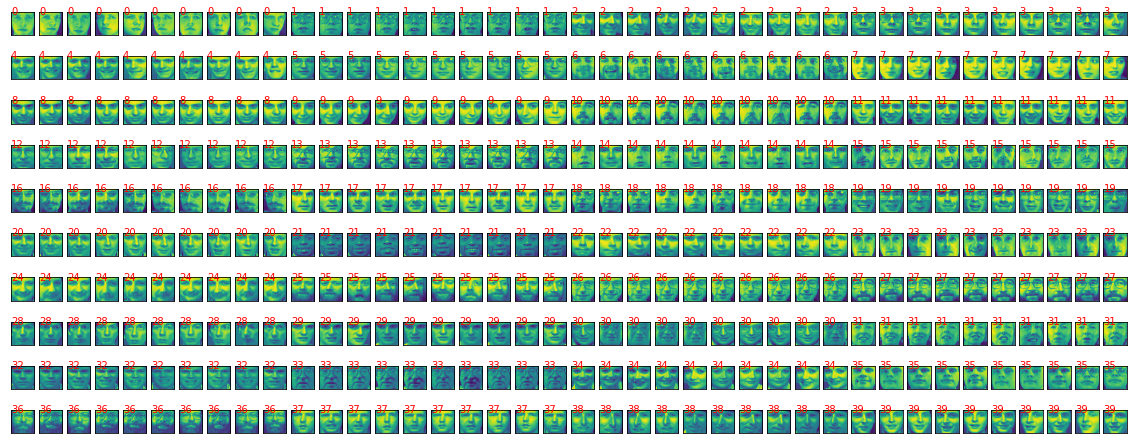

In [6]:
fig = plt.figure(figsize=(20, 8))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

for i in range(400):
    ax = fig.add_subplot(10, 40, i + 1, xticks=[], yticks=[])
    ax.imshow(
        faces.images[i])
    ax.text(0, 7, str(faces.target[i]), color='red')

pass;

# 3. k-средних кластеризация.

In [7]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=40, n_init=100)
model.fit(faces.data)
labels_kmeans = model.predict(faces.data)

## Confusion matrix для результатов k-средних кластеризации.

In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(faces.target, labels_kmeans)

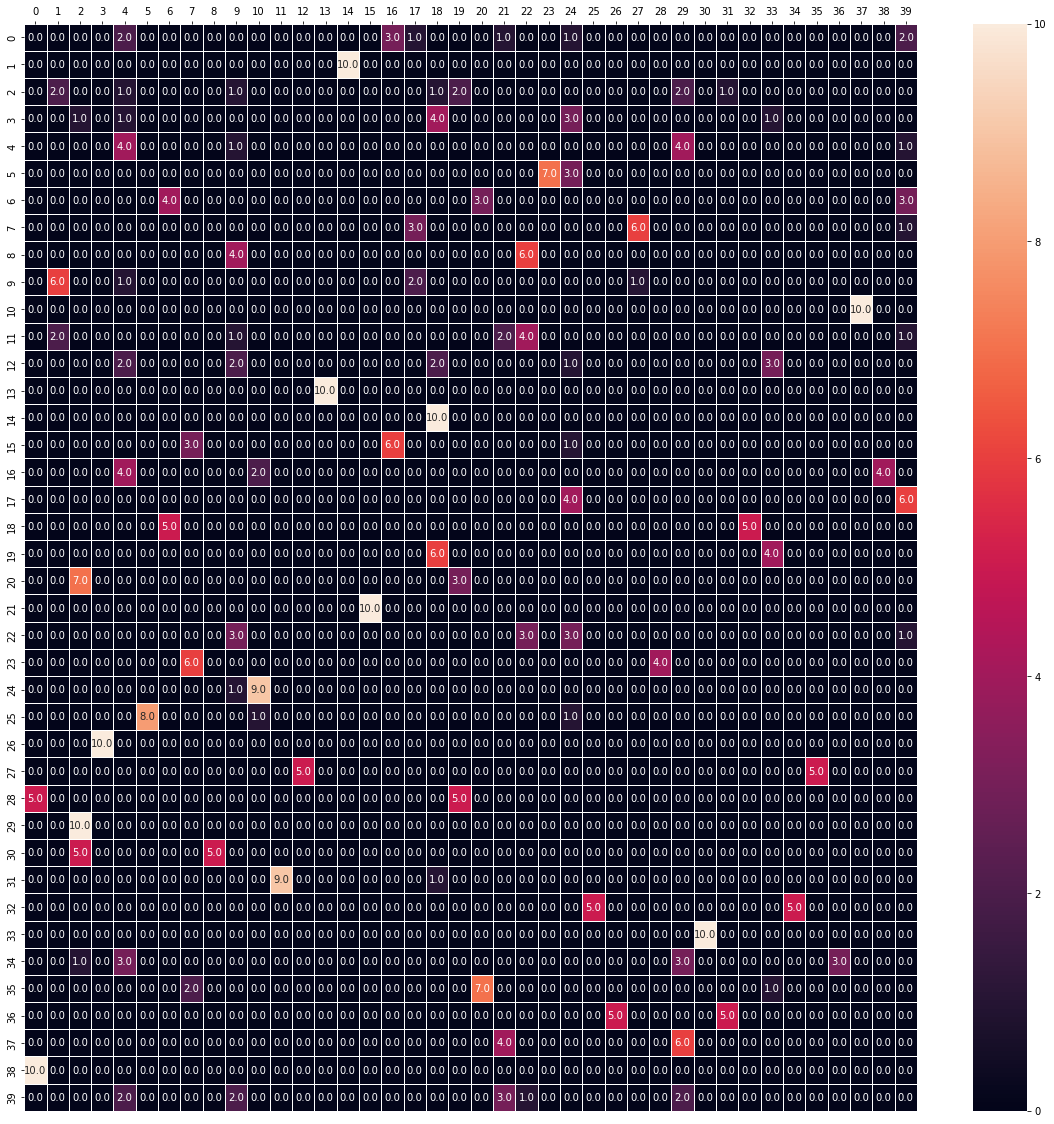

In [9]:
import pandas as pd
fig, ax = plt.subplots(figsize=(20, 20))
df_cm = pd.DataFrame(confusion_matrix)
ax = sns.heatmap(df_cm, annot=True, fmt=".1f", linewidth=.5, vmax=10)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

# <mark>**k-средних кластеризация полностью верно выявила лица 1, 10, 13, 21, 20, 29, 32, 33, 38.**<mark>

# Иерархическая кластеризация.

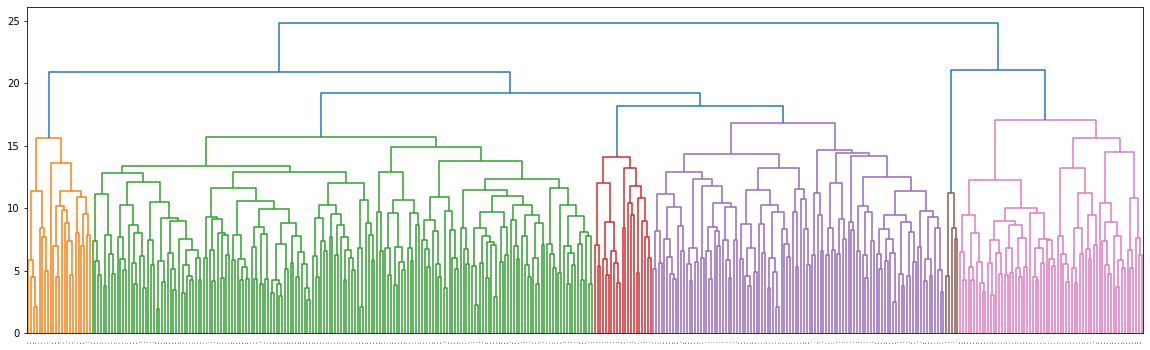

In [10]:
from scipy.cluster.hierarchy import linkage, dendrogram
fig = plt.figure(figsize = [20, 6])
mergings = linkage(faces.data, method='complete')
dendrogram(mergings, labels=faces.target, leaf_rotation=90, leaf_font_size=2)
plt.show()

In [11]:
from scipy.cluster.hierarchy import linkage, dendrogram, centroid
mergings = linkage(faces.data, method='complete')
from scipy.cluster.hierarchy import fcluster
labels_hier = fcluster(mergings, 11.6, criterion='distance')

## Confusion matrix для результатов иерархической кластеризации.

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(faces.target, labels_hier)

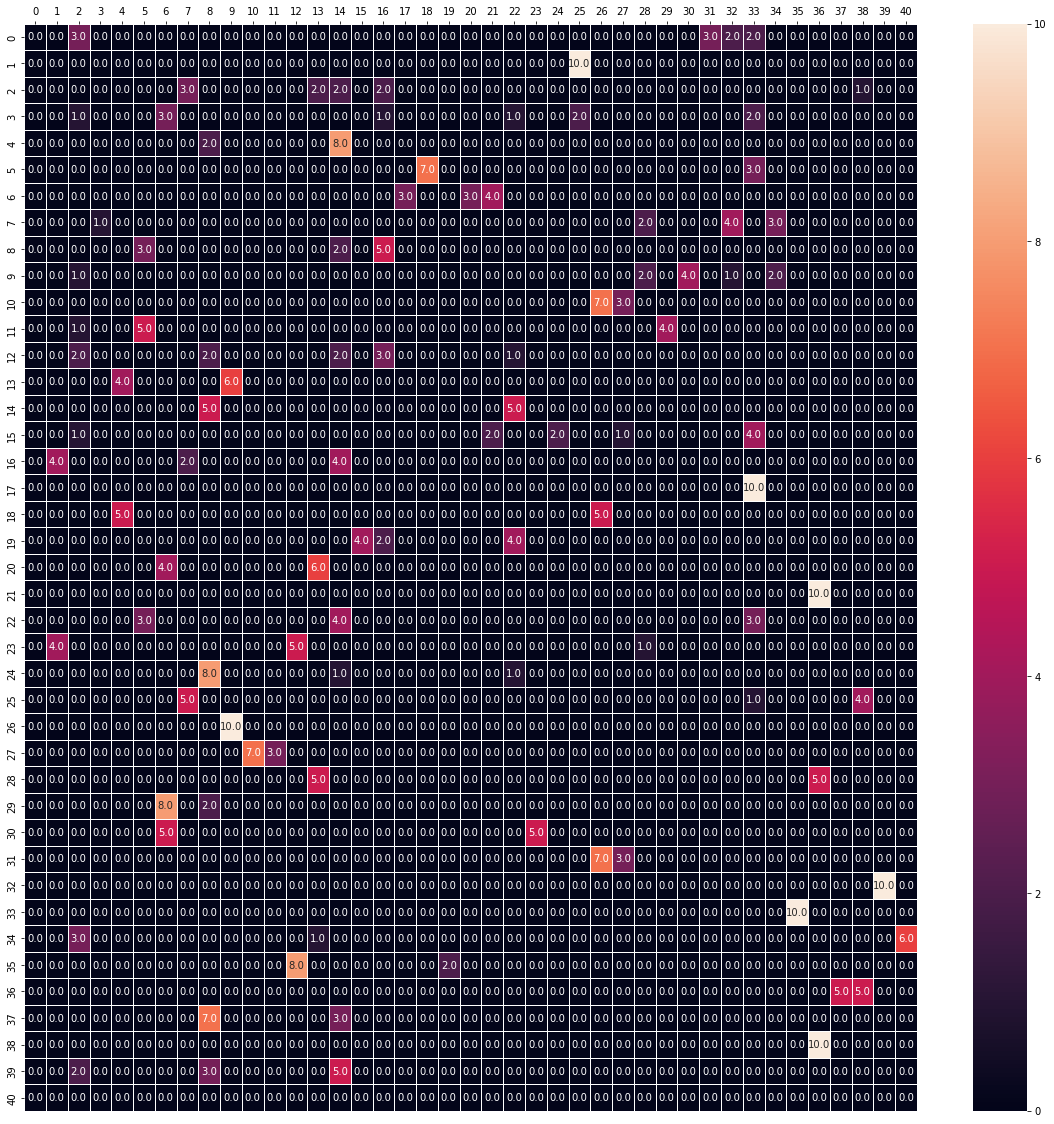

In [13]:
fig, ax = plt.subplots(figsize=(20, 20))
df_cm = pd.DataFrame(confusion_matrix)
ax = sns.heatmap(df_cm, annot=True, fmt=".1f", linewidth=.5, vmax=10)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

## <mark>**Иерархическая кластеризация верно выявила только лица 1, 17, 21, 26, 32, 33, 38. Качество k-средних кластеризации значительно выше.**<mark>

## Визуализиция центроидов результата k-средних кластеризации.

In [14]:
centroids = model.cluster_centers_

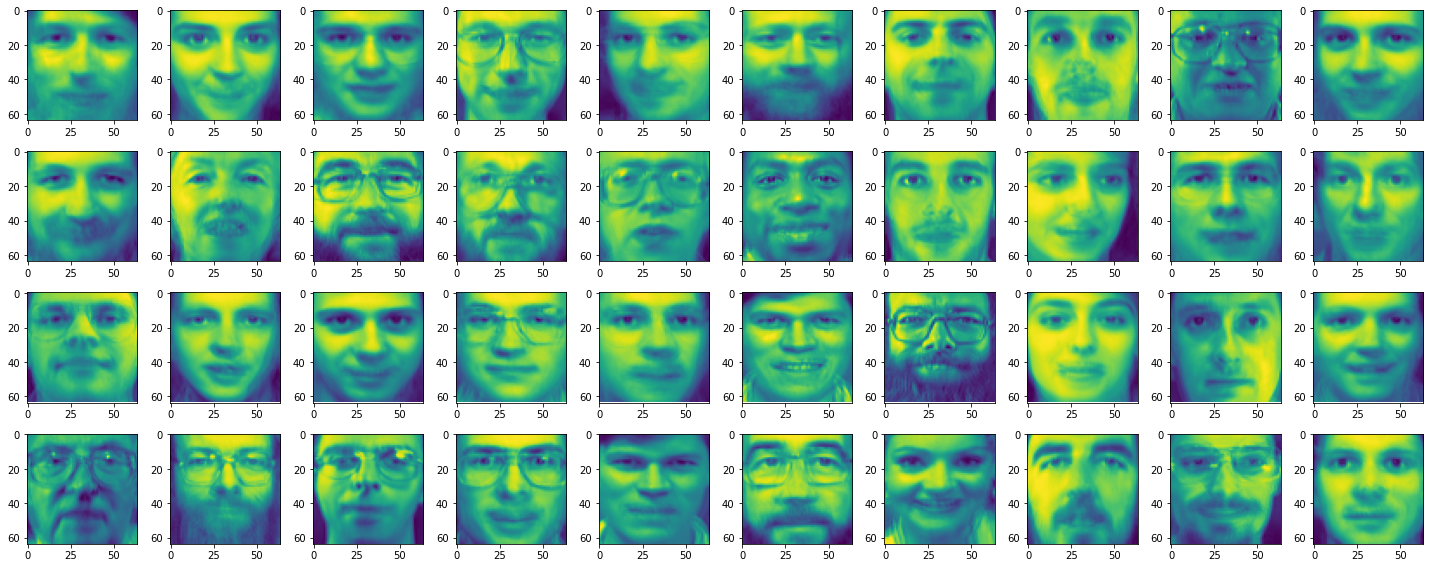

In [15]:
fig, axes = plt.subplots(nrows=4, ncols=10,  figsize=(20, 8))
ax = axes.ravel()

for i in range(40):
    ax[i].imshow(centroids[i].reshape(64, 64))

plt.tight_layout()
plt.show()

## Визуализация средних значения кластеров, полученных иерархической кластеризацией.

In [16]:
flat_faces = [i.flatten() for i in faces.data]

In [17]:
flat_df_hier = pd.DataFrame({'data': flat_faces, 'clusters': labels_hier, 'faces': faces.target})

In [18]:
flat_df_hier.head()

,data,clusters,faces
0,"[0.30991736, 0.3677686, 0.41735536, 0.44214877...",32,0
1,"[0.45454547, 0.47107437, 0.5123967, 0.55785125...",31,0
2,"[0.3181818, 0.40082645, 0.49173555, 0.5289256,...",32,0
3,"[0.1983471, 0.19421488, 0.19421488, 0.19421488...",2,0
4,"[0.5, 0.54545456, 0.58264464, 0.62396693, 0.64...",31,0


In [19]:
centroids_hier = flat_df_hier.groupby('clusters')['data'].mean()

In [20]:
mean = [i.reshape(64, 64) for i in centroids_hier]

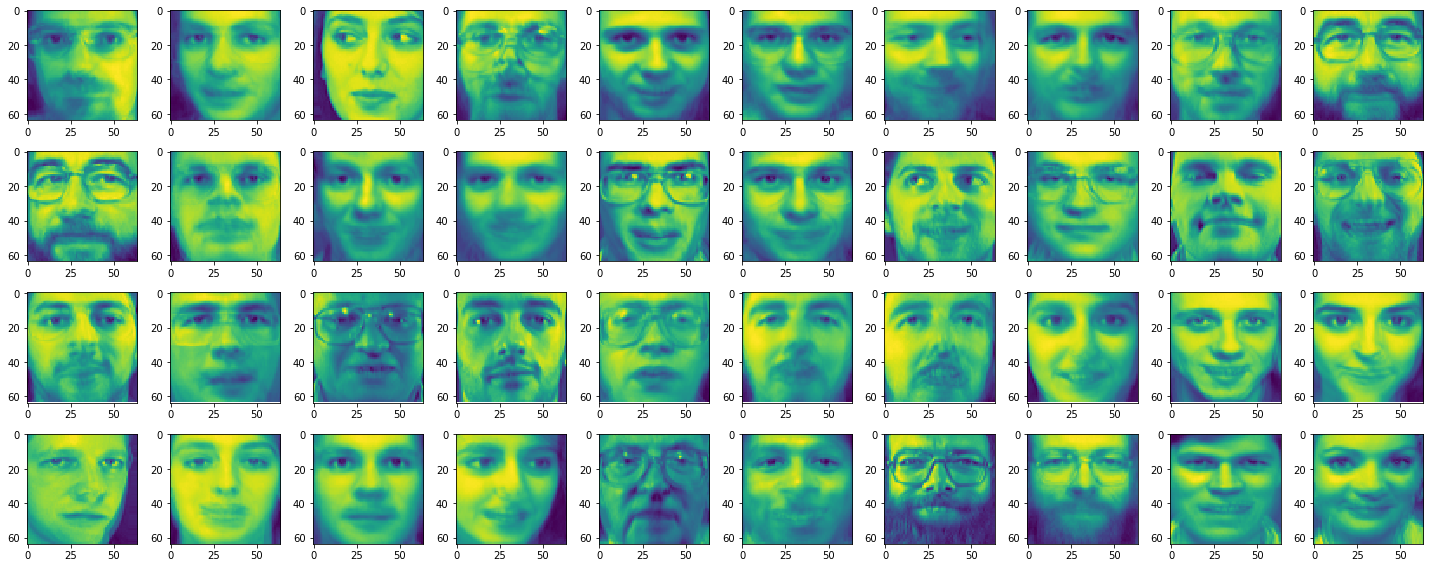

In [21]:
fig, axes = plt.subplots(nrows=4, ncols=10,  figsize=(20, 8))
ax = axes.ravel()

for i in range(40):
    ax[i].imshow(mean[i], interpolation='none')

plt.tight_layout()
plt.show()

## <mark>**Значительной разницы в результатах визуализации центроидов при разных видах кластеризации не обнаружено.**<mark>

## Выше при выборе количества кластеров применялась информация из описания датасета (classes = 40). Попробуем использовать метод локтя, силуэт, v-меру и меру Дэвиса Боулдина. Сможем ли мы верно получить кол-во кластеров?

**Метод локтя**

In [22]:
clusters = range(1, 50)
inertias = []
for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(faces.data)
    inertias.append(model.inertia_)

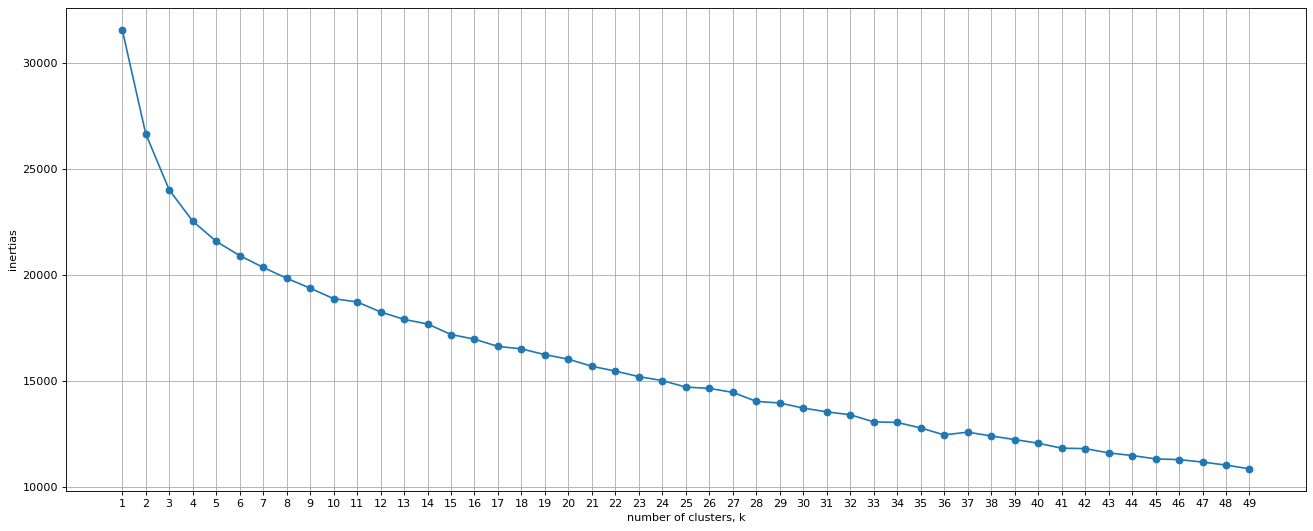

In [23]:
plt.figure(figsize=(20, 8), dpi=80)
plt.plot(clusters, inertias, marker='o');
plt.grid(True)
plt.xticks(clusters)
plt.xlabel('number of clusters, k')
plt.ylabel('inertias');

# <mark> **Метод локтя не дал точного понимания кол-ва кластеров.**<mark>

**Силуэт, v-мера, мера Дэвиса Боулдина**

In [24]:
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score
from sklearn.cluster import AgglomerativeClustering

In [25]:
kmeans_silhouette = []
hier_silhouette = []
kmeans_vmeasure_score = []
hier_vmeasure_score = []
kmeans_davies_bouldin_score = []
hier_davies_bouldin_score = []

for i in range(2,51):
    model_kmeans = KMeans(n_clusters=i, random_state=0)
    model_kmeans.fit(faces.data)
    labels_kmeans = model_kmeans.predict(faces.data)
    
    silhouette_kmeans = silhouette_score(faces.data, labels_kmeans)
    kmeans_silhouette.append(silhouette_kmeans)    
    
    model_hier = AgglomerativeClustering(n_clusters=i)
    labels_hier = model_hier.fit_predict(faces.data)
    
    silhouette_hier = silhouette_score(faces.data, labels_hier)
    hier_silhouette.append(silhouette_hier)
    
    v_measure_kmeans = v_measure_score(faces.target, labels_kmeans)
    kmeans_vmeasure_score.append(v_measure_kmeans)
    
    v_measure_hier = v_measure_score(faces.target, labels_hier)
    hier_vmeasure_score.append(v_measure_hier) 
    
    davies_bouldin_score_kmeans = davies_bouldin_score(faces.data, labels_kmeans)
    kmeans_davies_bouldin_score.append(davies_bouldin_score_kmeans) 
 
    davies_bouldin_score_hier = davies_bouldin_score(faces.data, labels_hier)
    hier_davies_bouldin_score.append(davies_bouldin_score_hier)
    

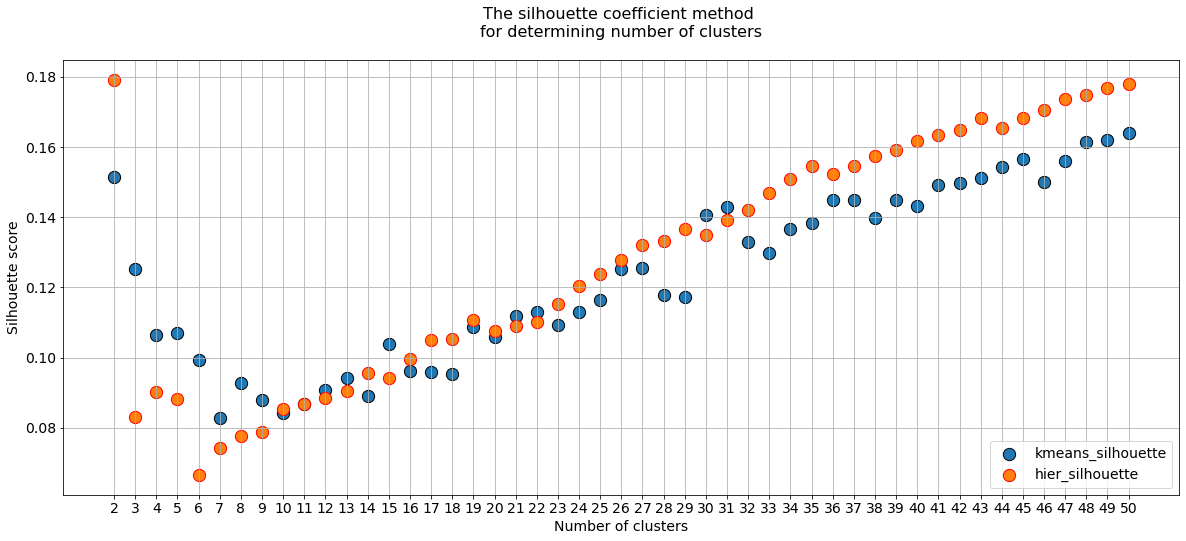

In [26]:
plt.figure(figsize=(20,8))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,51)], y=kmeans_silhouette,s=150, edgecolor='k', label='kmeans_silhouette')
plt.scatter(x=[i for i in range(2,51)], y=hier_silhouette,s=150, edgecolor='r', label='hier_silhouette')
plt.grid(True)
plt.xlabel("Number of clusters", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.xticks([i for i in range(2,51)], fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.show()

# <mark>**График силуэта также не дает четкого понимания кол-ва кластеров.**<mark>

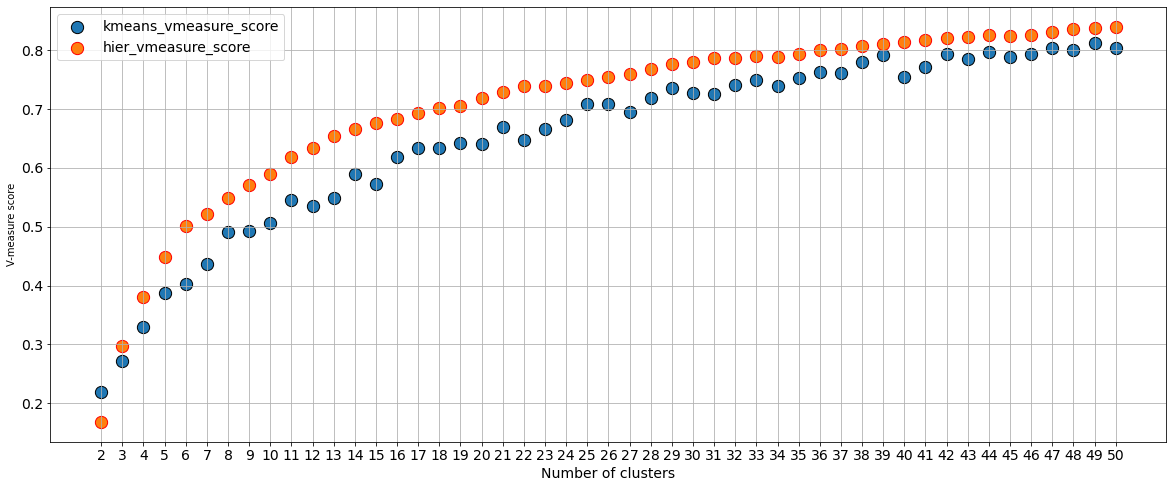

In [27]:
plt.figure(figsize=(20,8))
plt.scatter(x=[i for i in range(2,51)], y=kmeans_vmeasure_score,s=150, edgecolor='k', label='kmeans_vmeasure_score')
plt.scatter(x=[i for i in range(2,51)], y=hier_vmeasure_score,s=150, edgecolor='r', label='hier_vmeasure_score')
plt.grid(True)
plt.xlabel("Number of clusters", fontsize=14)
plt.ylabel("V-measure score")
plt.xticks([i for i in range(2,51)], fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.show()

# <mark> **Согласно графику показателей v-меры выше  сделала бы вывод, что при 39 кластерах при k-средних кластеризации v-мера достигнет максимума. График v-меры иерархической кластеризации не показателен.**<mark>

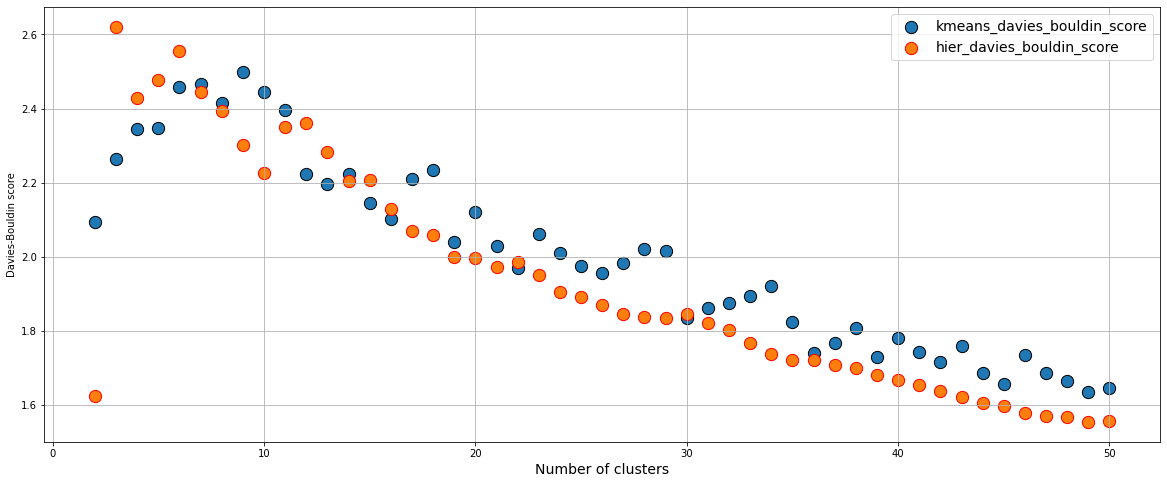

In [28]:
plt.figure(figsize=(20,8))
plt.scatter(x=[i for i in range(2,51)],y=kmeans_davies_bouldin_score, s=150, edgecolor='k', label='kmeans_davies_bouldin_score')
plt.scatter(x=[i for i in range(2,51)],y=hier_davies_bouldin_score, s=150, edgecolor='r', label='hier_davies_bouldin_score')
plt.grid(True)
plt.ylabel("Davies-Bouldin score")
plt.xlabel("Number of clusters", fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.show()

# <mark> **График меры Дэвиса Боулдина также не дает четкого понимания кол-ва кластеров.**<mark>

# 4. Снижение размерности признакового пространства

# TruncatedSVD

In [29]:
from sklearn.decomposition import TruncatedSVD

np.random.seed(0)

features = [2, 5, 10, 20]

kmeans_silhouette_svd = []
hier_silhouette_svd = []
kmeans_vmeasure_score_svd = []
hier_vmeasure_score_svd = []
kmeans_davies_bouldin_score_svd = []
hier_davies_bouldin_score_svd = []

for i in features:
    model_svd = TruncatedSVD(n_components=i)
    model_svd.fit(faces.data)
    model_svd_transformed = model_svd.transform(faces.data)
    
    model_kmeans = KMeans(n_clusters=40, random_state=0)
    model_kmeans.fit(model_svd_transformed)
    labels_kmeans = model_kmeans.predict(model_svd_transformed) 
        
    silhouette_kmeans = silhouette_score(model_svd_transformed, labels_kmeans)
    kmeans_silhouette_svd.append(silhouette_kmeans)
    
    model_hier = AgglomerativeClustering(n_clusters=40)
    labels_hier = model_hier.fit_predict(model_svd_transformed)
    
    silhouette_hier = silhouette_score(model_svd_transformed, labels_hier)
    hier_silhouette_svd.append(silhouette_hier)
    
    v_measure_kmeans = v_measure_score(faces.target, labels_kmeans)
    kmeans_vmeasure_score_svd.append(v_measure_kmeans)
    
    v_measure_hier = v_measure_score(faces.target, labels_hier)
    hier_vmeasure_score_svd.append(v_measure_hier) 
    
    davies_bouldin_score_kmeans = davies_bouldin_score(faces.data, labels_kmeans)
    kmeans_davies_bouldin_score_svd.append(davies_bouldin_score_kmeans) 
 
    davies_bouldin_score_hier = davies_bouldin_score(faces.data, labels_hier)
    hier_davies_bouldin_score_svd.append(davies_bouldin_score_hier)

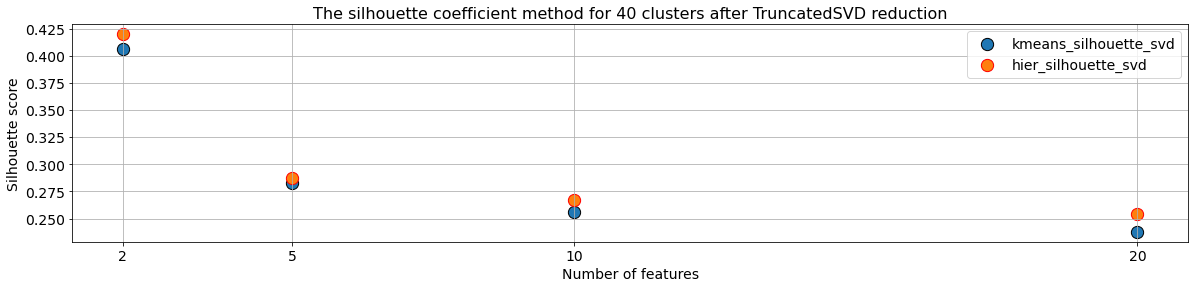

In [30]:
plt.figure(figsize=(20,4))
plt.title("The silhouette coefficient method for 40 clusters after TruncatedSVD reduction",fontsize=16)
plt.scatter(x=features,y=kmeans_silhouette_svd,s=150,edgecolor='k', label='kmeans_silhouette_svd')
plt.scatter(x=features,y=hier_silhouette_svd,s=150,edgecolor='r', label='hier_silhouette_svd')
plt.grid(True)
plt.xlabel("Number of features",fontsize=14)
plt.ylabel("Silhouette score",fontsize=14)
plt.xticks(features,fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.show()

## <mark> **После снижения размерности с помощью TruncatedSVD максимальная метрика силуэта при k-средних и при иерархической кластеризации была достигнута при количестве признаков 2.<mark>

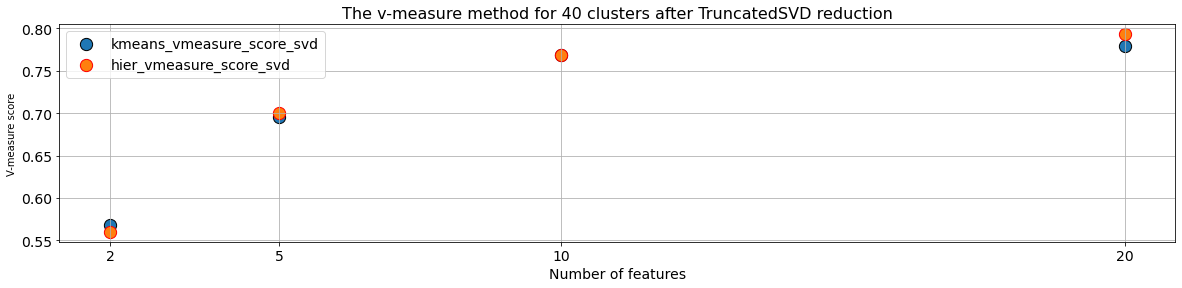

In [31]:
plt.figure(figsize=(20,4))
plt.title("The v-measure method for 40 clusters after TruncatedSVD reduction",fontsize=16)
plt.scatter(x=features,y=kmeans_vmeasure_score_svd,s=150,edgecolor='k', label='kmeans_vmeasure_score_svd')
plt.scatter(x=features,y=hier_vmeasure_score_svd,s=150,edgecolor='r', label='hier_vmeasure_score_svd')
plt.grid(True)
plt.xlabel("Number of features",fontsize=14)
plt.ylabel("V-measure score")
plt.xticks(features,fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.show()

## <mark>**После снижения размерности с помощью TruncatedSVD максимальная v-метрика была достигнута при 20 признаках.**<mark>

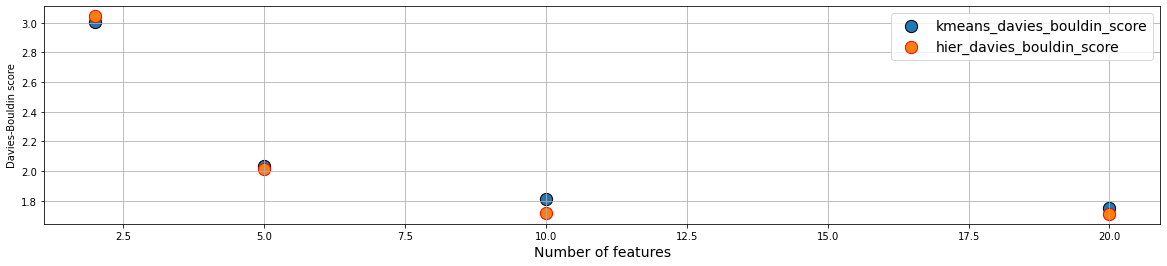

In [32]:
plt.figure(figsize=(20,4))
plt.scatter(x=features,y=kmeans_davies_bouldin_score_svd, s=150, edgecolor='k', label='kmeans_davies_bouldin_score')
plt.scatter(x=features,y=hier_davies_bouldin_score_svd, s=150, edgecolor='r', label='hier_davies_bouldin_score')
plt.grid(True)
plt.ylabel("Davies-Bouldin score")
plt.xlabel("Number of features",fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.show()

## <mark> **После снижения размерности с помощью TruncatedSVD минимальный показатель меры Дэвиса Боулдина была достигнут при 20 признаках.** <mark>

# t-SNE

In [33]:
from sklearn.manifold import TSNE
model_tsne = TSNE(n_components=2, random_state=0)
model_tsne_transformed = model_tsne.fit_transform(faces.data)

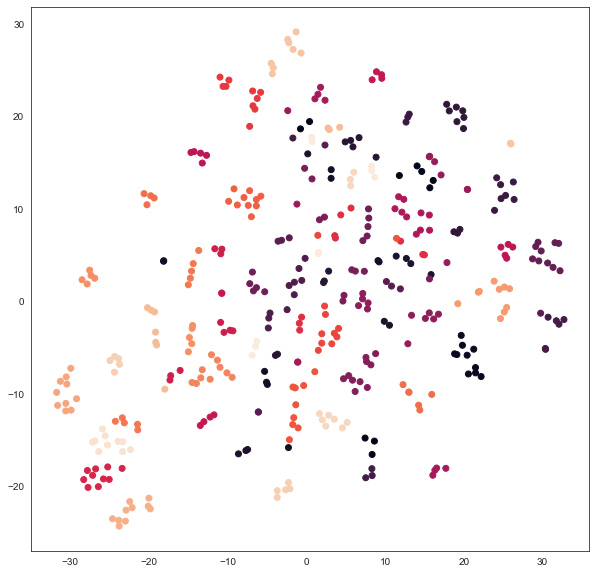

In [34]:
sns.set_style("white")
plt.figure(figsize=(10, 10))
xs = model_tsne_transformed[:, 0]
ys = model_tsne_transformed[:, 1]
plt.scatter(xs, ys, c=faces.target)

In [35]:
model_tsne_kmeans = KMeans(n_clusters=40, random_state=0)
model_tsne_kmeans.fit(model_tsne_transformed)
labels_tsne_kmeans = model_tsne_kmeans.predict(model_tsne_transformed) 
        
silhouette_tsne_kmeans = silhouette_score(model_tsne_transformed, labels_tsne_kmeans)
    
model_tsne_hier = AgglomerativeClustering(n_clusters=40)
labels_tsne_hier = model_tsne_hier.fit_predict(model_tsne_transformed)
    
silhouette_tsne_hier = silhouette_score(model_tsne_transformed, labels_tsne_hier)
    
v_measure_tsne_kmeans = v_measure_score(faces.target, labels_tsne_kmeans)
    
v_measur_tsnee_hier = v_measure_score(faces.target, labels_tsne_hier)


In [36]:
df_metrics = pd.DataFrame({'Silhouette original': [kmeans_silhouette[39], hier_silhouette[39]], 
                           'Silhouette SVD': [kmeans_silhouette_svd[0], hier_silhouette_svd[0]], # при 2 признаках
                           'Silhouette TSNE': [silhouette_tsne_kmeans, silhouette_tsne_hier], 
                           'V-measure original': [kmeans_vmeasure_score[39], hier_vmeasure_score[39]], 
                           'V-measure SVD': [kmeans_vmeasure_score_svd[3], hier_vmeasure_score_svd[3]], # при 20 признаках
                           'V-measure TSNE': [v_measure_tsne_kmeans, v_measur_tsnee_hier]}, index=['K-means', 'Hierarchical'])

In [37]:
df_metrics

,Silhouette original,Silhouette SVD,Silhouette TSNE,V-measure original,V-measure SVD,V-measure TSNE
K-means,0.149298,0.406319,0.477088,0.770336,0.779125,0.790672
Hierarchical,0.163477,0.419771,0.467393,0.816876,0.793086,0.802008


## <mark>**Силуэт и v-метрика показали лучший результат после снижения размерности методом TSNE, но в TSNE нет inverse_transform(X).**<mark>

# PCA

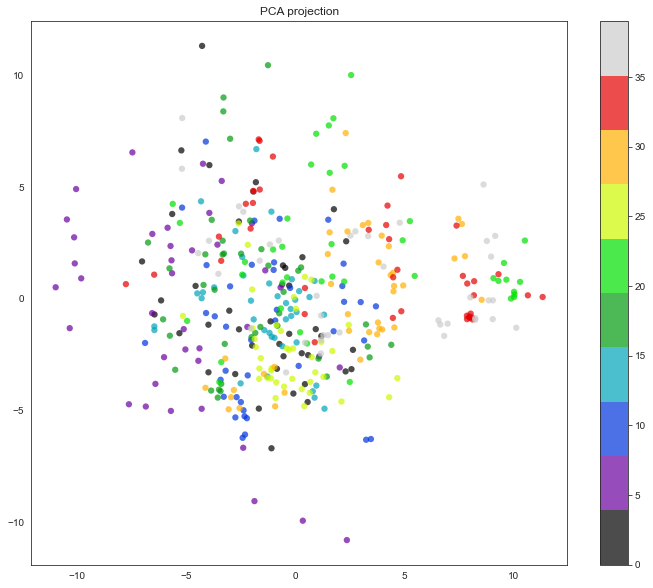

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=40)
faces_pca = pca.fit_transform(faces.data)

plt.figure(figsize=(12,10))
plt.scatter(faces_pca[:, 0], faces_pca[:, 1], c=faces.target, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('PCA projection');

In [39]:
model_pca_kmeans = KMeans(n_clusters=40, random_state=0)
model_pca_kmeans.fit(faces_pca)
labels_pca_kmeans = model_pca_kmeans.predict(faces_pca) 
silhouette_pca_kmeans = silhouette_score(faces_pca, labels_pca_kmeans)
v_measure_pca_kmeans = v_measure_score(faces.target, labels_pca_kmeans)

In [40]:
from sklearn.cluster import AgglomerativeClustering
model_pca_hier = AgglomerativeClustering(n_clusters=40)
labels_pca_hier = model_pca_hier.fit_predict(faces_pca)
silhouette_pca_hier = silhouette_score(faces_pca, labels_pca_hier)
v_measure_pca_hier = v_measure_score(faces.target, labels_pca_hier)

In [41]:
df_metrics = pd.DataFrame({'Silhouette original': [kmeans_silhouette[39], hier_silhouette[39]], 
                           'Silhouette SVD': [kmeans_silhouette_svd[0], hier_silhouette_svd[0]],
                           'Silhouette PCA': [silhouette_pca_kmeans, silhouette_pca_hier],
                           'Silhouette TSNE': [silhouette_tsne_kmeans, silhouette_tsne_hier], 
                           'V-measure original': [kmeans_vmeasure_score[39], hier_vmeasure_score[39]], 
                           'V-measure SVD': [kmeans_vmeasure_score_svd[3], hier_vmeasure_score_svd[3]], 
                           'V-measure PCA': [v_measure_pca_kmeans, v_measure_pca_hier],
                           'V-measure TSNE': [v_measure_tsne_kmeans, v_measur_tsnee_hier],
                           }, index=['K-means', 'Hierarchical'])

In [42]:
df_metrics

,Silhouette original,Silhouette SVD,Silhouette PCA,Silhouette TSNE,V-measure original,V-measure SVD,V-measure PCA,V-measure TSNE
K-means,0.149298,0.406319,0.217452,0.477088,0.770336,0.779125,0.794243,0.790672
Hierarchical,0.163477,0.419771,0.234027,0.467393,0.816876,0.793086,0.815839,0.802008


## <mark>**Лучшие результаты показала иерархическая кластеризация (v-мера) без снижения размерности. Следующий лучший показатель с методом inverse_transform у иерархической кластеризации со снижение размерности при помощи PCA.**<mark>